In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Download and process data

In [2]:
vaccinations_url = "data/covid19za_provincial_cumulative_timeline_vaccination.csv"

In [3]:
outformat = 'pdf'

In [4]:
vaccinations = pd.read_csv(vaccinations_url, parse_dates=['date'], index_col='date', dayfirst=True).rename(columns={'total': 'SA'})
del vaccinations['YYYYMMDD']

In [5]:
vaccinations

,EC,FS,GP,KZN,LP,MP,NC,NW,WC,SA,source
date,,,,,,,,,,,
2021-02-17,5.0,12.0,28.0,42.0,NaN,NaN,20.0,NaN,60.0,167,https://sacoronavirus.co.za/latest-vaccine-sta...
2021-02-18,96.0,272.0,393.0,409.0,NaN,NaN,196.0,268.0,348.0,1982,https://sacoronavirus.co.za/latest-vaccine-sta...
2021-02-19,326.0,559.0,1401.0,1288.0,75.0,527.0,490.0,960.0,908.0,6534,https://sacoronavirus.co.za/latest-vaccine-sta...
2021-02-20,NaN,NaN,1799.0,NaN,503.0,1400.0,579.0,1501.0,1646.0,9601,https://sacoronavirus.co.za/latest-vaccine-sta...
2021-02-21,564.0,NaN,2743.0,NaN,1216.0,2578.0,830.0,2226.0,2484.0,14488,https://sacoronavirus.co.za/latest-vaccine-sta...
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-30,2596793.0,1256401.0,6004420.0,3486775.0,2282253.0,1295761.0,454593.0,1344401.0,3665517.0,22386914,https://sacoronavirus.co.za/latest-vaccine-sta...
2021-10-31,2598412.0,1256976.0,6008869.0,3491671.0,2282325.0,1296979.0,454686.0,1348622.0,3665827.0,22404367,https://sacoronavirus.co.za/latest-vaccine-sta...
2021-11-01,2605165.0,1259597.0,6026655.0,3506566.0,2287901.0,1303060.0,456018.0,1360290.0,3669153.0,22474405,https://sacoronavirus.co.za/latest-vaccine-sta...


In [6]:
population = 60e6
totalvaccinated = vaccinations['SA'][-1]

In [7]:
newvaccinations = vaccinations['SA'].diff().resample('1D').mean().fillna(0)

In [8]:
def percentage(pop):
    return pop/population*100

def pop(perc):
    return perc/100*population

In [9]:
hifrac = 2/3

In [10]:
hi = hifrac*population
left = hi - totalvaccinated

In [11]:
rate = newvaccinations.rolling('7D').mean()

In [12]:
maxrate = rate.max()

In [13]:
year = 365

In [14]:
hi/maxrate/year

0.5145767415631582

In [15]:
today = vaccinations.index.max().date()

# Plot

In [16]:
rate/1000

date
2021-02-17      0.000000
2021-02-18      0.907500
2021-02-19      2.122333
2021-02-20      2.358500
2021-02-21      2.864200
                 ...    
2021-10-30    148.144000
2021-10-31    147.762857
2021-11-01    130.896143
2021-11-02    125.929571
2021-11-03    119.937000
Freq: D, Name: SA, Length: 260, dtype: float64

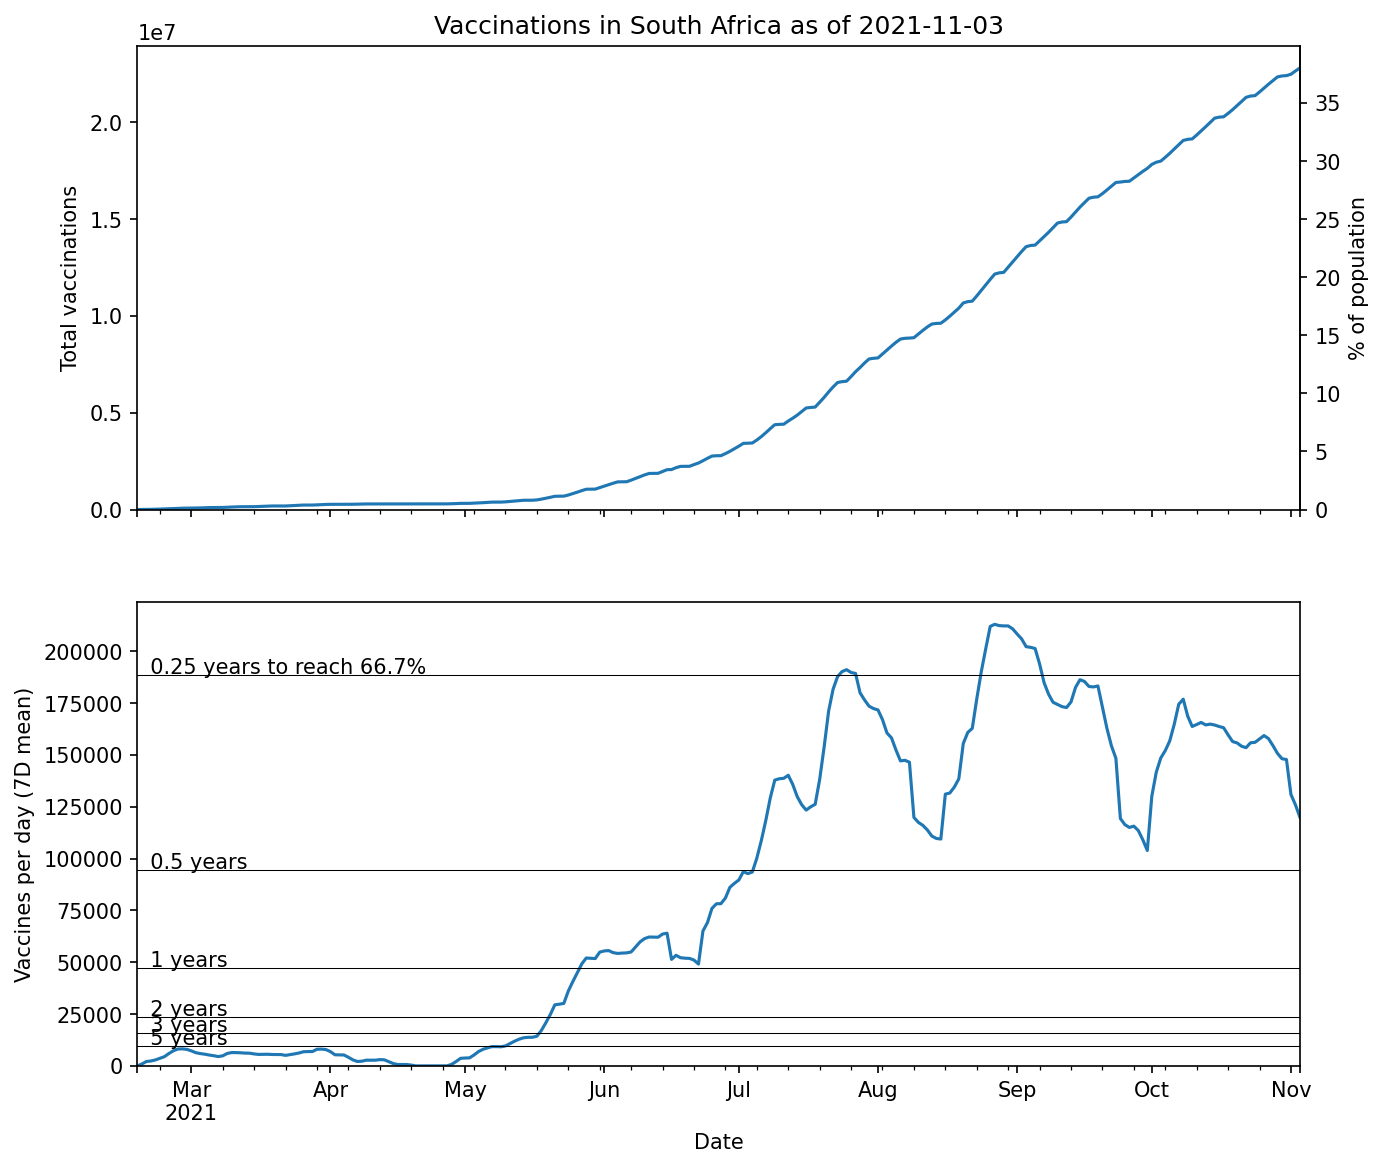

In [17]:
fig, (axtotal, axrate) = plt.subplots(2, 1, figsize=(10, 10), dpi=150, sharex=True)

vaccinations['SA'].plot(ax=axtotal, ylabel='Total vaccinations')
rate.plot(ax=axrate, ylabel='Vaccines per day (7D mean)', xlabel='Date')

axperc = axtotal.secondary_yaxis('right', functions=(percentage, pop))
axperc.set_ylabel('% of population')

axtotal.set_title(f'Vaccinations in South Africa as of {today}')

times = 0.25, 0.5, 1, 2, 3, 5

for time in times:
    rateleft = left/(time*year)
    axrate.axhline(rateleft, color='black', lw=0.5)
    if time == times[0]:
        label = f'  {time} years to reach {hifrac:.1%}'
    else:
        label = f'  {time} years'
    axrate.text(rate.index.min(), rateleft+1000, label)
    
axrate.set_ylim(bottom=0)
axtotal.set_ylim(bottom=0)

plt.savefig(f'output/vaccinations.{outformat}')